In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [2]:
import gdown

# Enlace corregido con el ID del archivo
url = 'https://drive.google.com/uc?id=1S594-FNI-ROTXLYv46KcjsmvjkvzOSLk'

# Descargar el archivo CSV
output = 'archivo.csv'
gdown.download(url, output, quiet=False)

# Cargar el CSV a un DataFrame con pandas
df = pd.read_csv(output)
df

Downloading...
From (original): https://drive.google.com/uc?id=1S594-FNI-ROTXLYv46KcjsmvjkvzOSLk
From (redirected): https://drive.google.com/uc?id=1S594-FNI-ROTXLYv46KcjsmvjkvzOSLk&confirm=t&uuid=c15a5d69-25e1-4f52-9a36-9a38aafa66ea
To: /Users/cristiramirez/Documents/IRONHACK/GitHub/Mini-project SQL/lab-eda-bivariate/archivo.csv
100%|██████████| 481M/481M [00:09<00:00, 51.5MB/s] 


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [3]:

crosstab = pd.crosstab(df['category'], df['isBestSeller'], normalize='index')

crosstab['BestSellerRatio'] = crosstab[True]
crosstab_sorted = crosstab.sort_values(by='BestSellerRatio', ascending=False)

crosstab_sorted

isBestSeller,False,True,BestSellerRatio
category,,,
Grocery,0.941865,0.058135,0.058135
Smart Home Security & Lighting,0.942308,0.057692,0.057692
Health & Personal Care,0.942314,0.057686,0.057686
Mobile Phone Accessories,0.957529,0.042471,0.042471
Power & Hand Tools,0.964661,0.035339,0.035339
...,...,...,...
"CD, Disc & Tape Players",1.000000,0.000000,0.000000
General Music-Making Accessories,1.000000,0.000000,0.000000
Snowboard Boots,1.000000,0.000000,0.000000


In [6]:
contingency_table = pd.crosstab(df['category'], df['isBestSeller'])

# Realizar la prueba Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calcular Cramér's V
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

chi2, p, cramers_v

(36540.20270061387, 0.0, 0.1222829439760564)

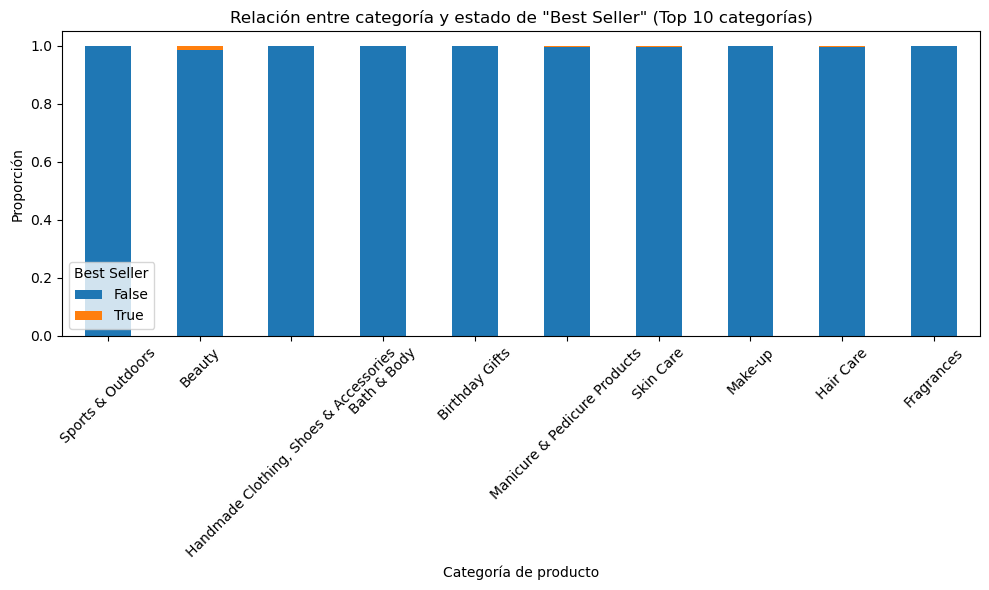

In [8]:
top_10_categories = contingency_table.sum(axis=1).sort_values(ascending=False).head(10).index

# Filtrar la tabla de contingencia para solo las 10 primeras categorías
top_10_contingency_table = contingency_table.loc[top_10_categories]

top_10_contingency_table.div(top_10_contingency_table.sum(1), axis=0).plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Relación entre categoría y estado de "Best Seller" (Top 10 categorías)')
plt.xlabel('Categoría de producto')
plt.ylabel('Proporción')
plt.legend(title='Best Seller')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje X si es necesario
plt.tight_layout()  # Ajustar el espaciado para evitar que las etiquetas se solapen
plt.show()

In [9]:
# Calcular los cuartiles y el IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar los productos que están dentro del rango (sin outliers)
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

df_no_outliers.head()  # Para ver cómo se ve el nuevo dataframe


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


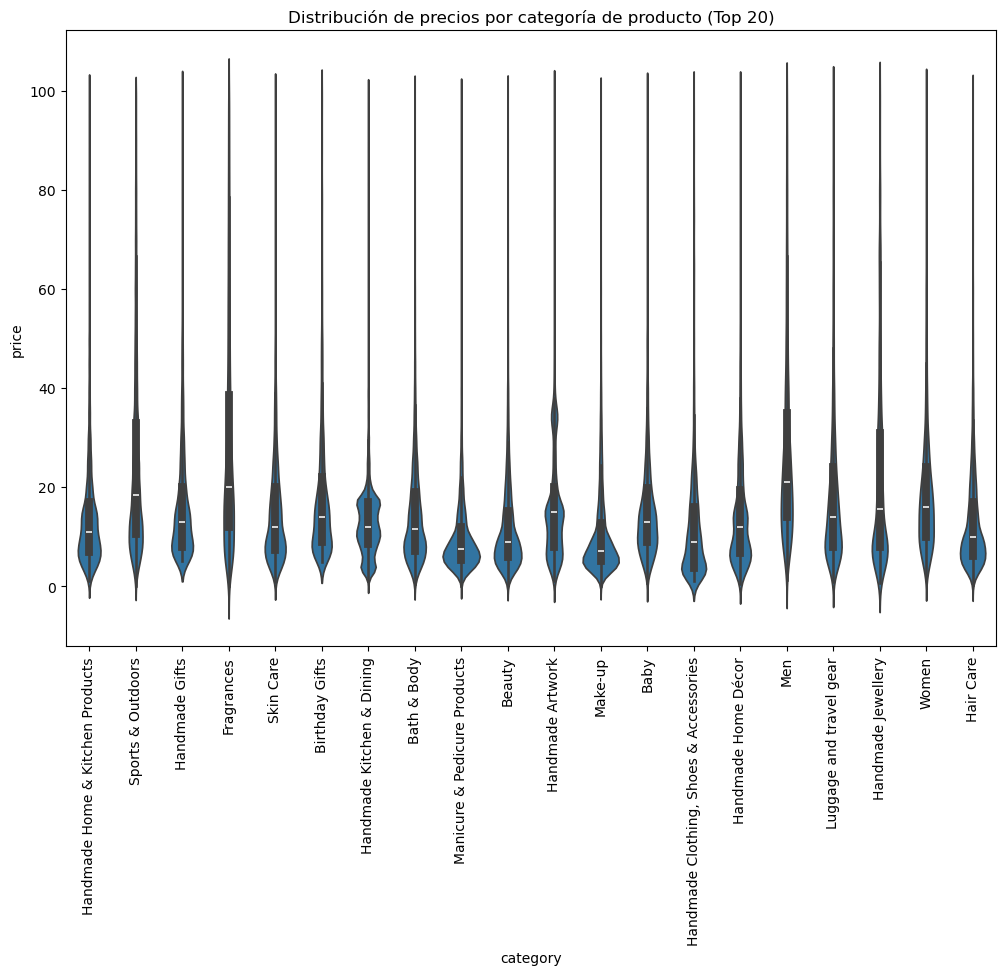

In [10]:
top_20_categories = df_no_outliers['category'].value_counts().head(20).index
df_top_20 = df_no_outliers[df_no_outliers['category'].isin(top_20_categories)]

# Crear el violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=df_top_20)
plt.xticks(rotation=90)
plt.title('Distribución de precios por categoría de producto (Top 20)')
plt.show()

In [11]:
median_prices = df_no_outliers.groupby('category')['price'].median().sort_values(ascending=False)
median_prices.head()  # Ver las categorías con mayor precio mediano


category
Desktop PCs       74.00
Boxing Shoes      69.79
Tablets           69.00
Graphics Cards    68.54
Motherboards      67.92
Name: price, dtype: float64

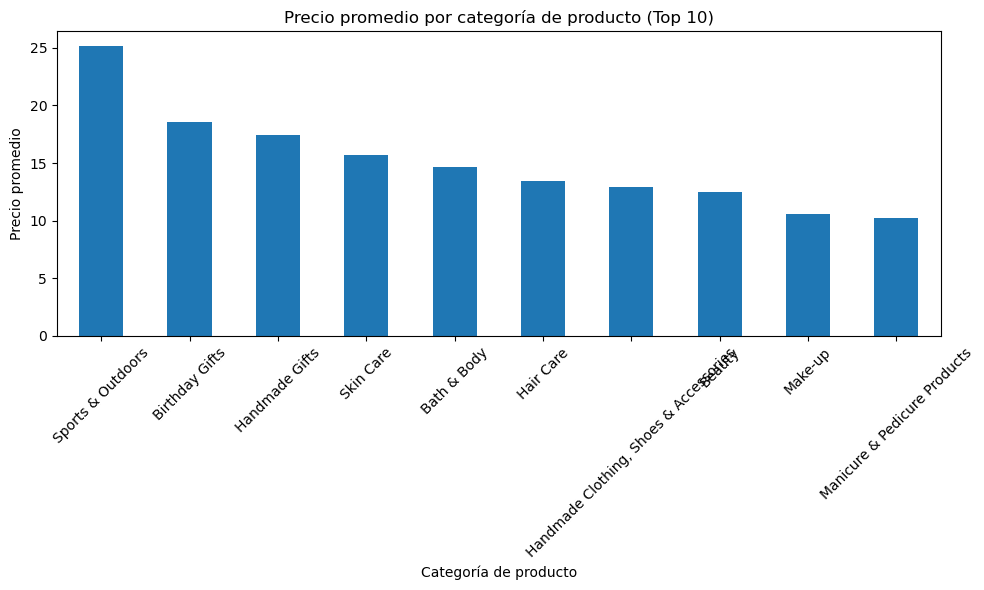

In [12]:
top_10_categories = df_no_outliers['category'].value_counts().head(10).index
df_top_10 = df_no_outliers[df_no_outliers['category'].isin(top_10_categories)]

# Calcular el precio promedio para cada categoría
avg_price_per_category = df_top_10.groupby('category')['price'].mean().sort_values(ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
avg_price_per_category.plot(kind='bar')
plt.title('Precio promedio por categoría de producto (Top 10)')
plt.ylabel('Precio promedio')
plt.xlabel('Categoría de producto')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

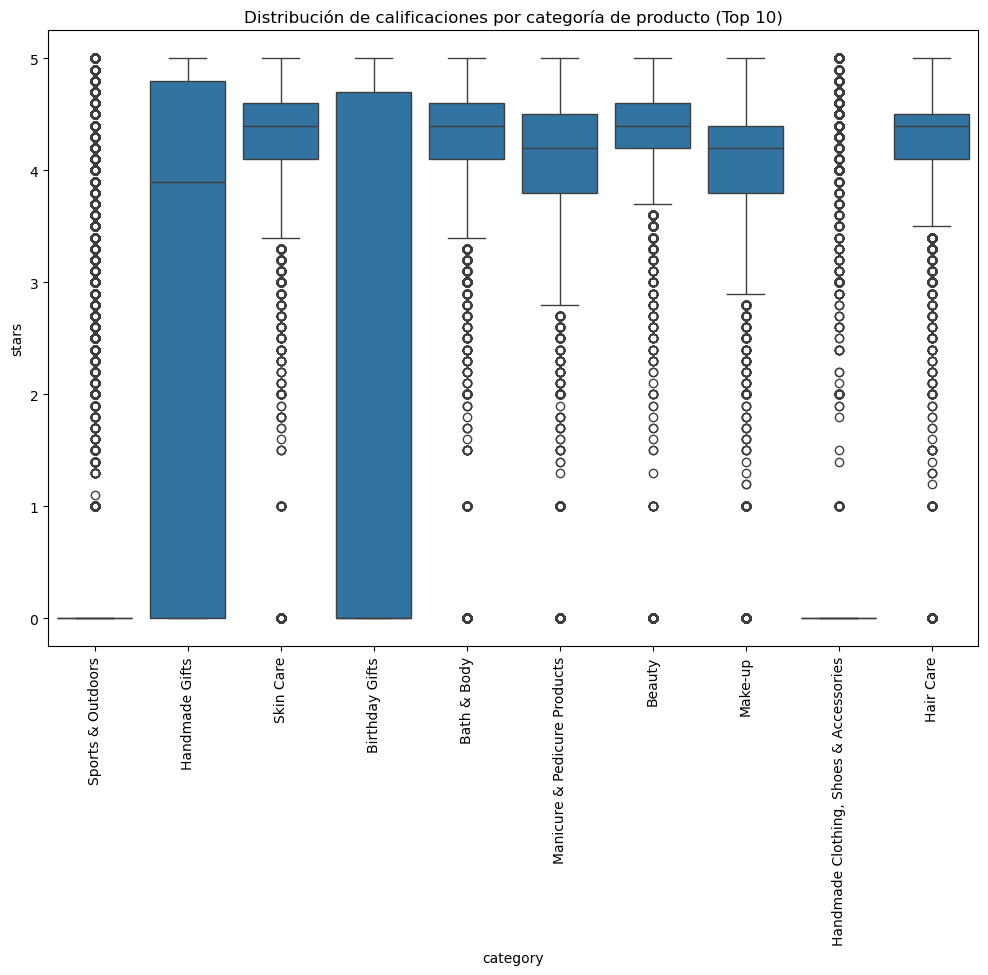

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=df_top_10)
plt.xticks(rotation=90)
plt.title('Distribución de calificaciones por categoría de producto (Top 10)')
plt.show()

In [14]:
median_ratings = df_no_outliers.groupby('category')['stars'].median().sort_values(ascending=False)
median_ratings.head()  # Ver las categorías con mayor calificación mediana


category
Computer Memory                 4.7
Building & Construction Toys    4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Kids' Play Figures              4.6
Name: stars, dtype: float64

In [15]:
# Calcular el coeficiente de correlación entre precio y calificaciones (stars)
correlation = df_no_outliers['price'].corr(df_no_outliers['stars'])

correlation  # Mostrar el valor de la correlación


-0.07767299878181444

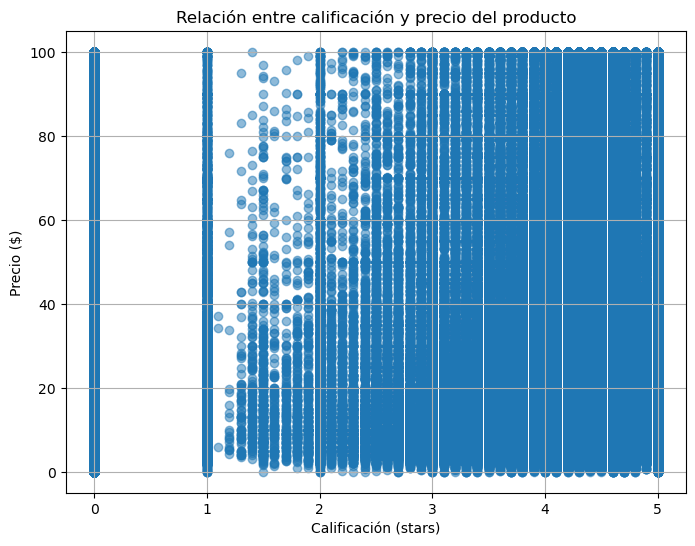

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(df_no_outliers['stars'], df_no_outliers['price'], alpha=0.5)
plt.title('Relación entre calificación y precio del producto')
plt.xlabel('Calificación (stars)')
plt.ylabel('Precio ($)')
plt.grid(True)
plt.show()

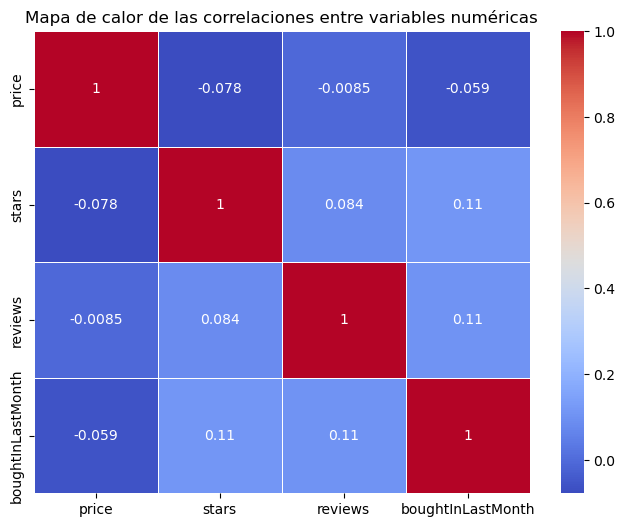

In [17]:
correlation_matrix = df_no_outliers[['price', 'stars', 'reviews', 'boughtInLastMonth']].corr()

# Crear un heatmap para visualizar las correlaciones
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de calor de las correlaciones entre variables numéricas')
plt.show()


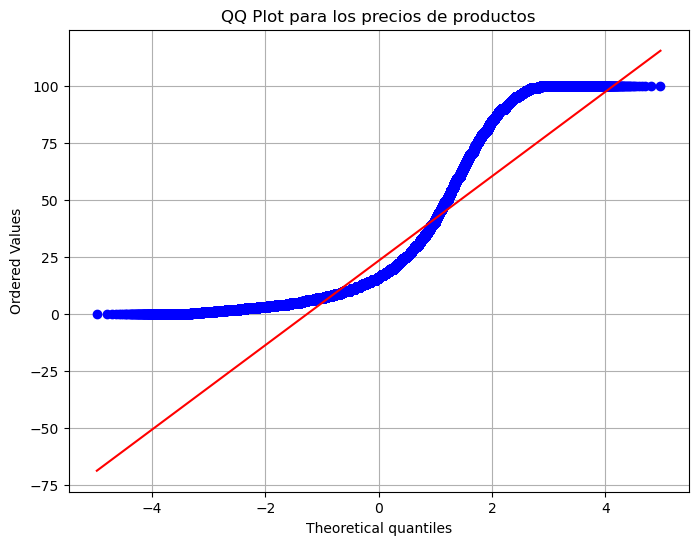

In [20]:
plt.figure(figsize=(8, 6))
stats.probplot(df_no_outliers['price'], dist="norm", plot=plt)
plt.title('QQ Plot para los precios de productos')
plt.grid(True)
plt.show()